## LOADING LIBRARIES & DATA


In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Read the datasets
face_similarity_df = pd.read_parquet('face_similarity_scores.parquet', engine='pyarrow')
# face_similarity_df.to_csv('face_similarity_scores.csv')
label_df = pd.read_parquet('label_same_person.parquet', engine='pyarrow')
# label_df.to_csv('label_df.csv')

## EXPLORATORY DATA ANALYSIS & DATA CLEANING


### face_similarity_df


In [183]:
print("Face Similarity Scores Dataset:")
print(face_similarity_df.head(10))

Face Similarity Scores Dataset:
      aid                                             scores
0  100011  [{'score': 33.083734274066444, 'uid': '2511448'}]
1  100024  [{'score': 73.56602733919276, 'uid': '9273160'...
2  100034   [{'score': 67.92745925961077, 'uid': '9742638'}]
3  100061  [{'score': 11.051541370588382, 'uid': '2889820'}]
4  100064  [{'score': 56.86153192851338, 'uid': '2840104'...
5  100067   [{'score': 38.52254162946638, 'uid': '7504366'}]
6  100092  [{'score': 33.46952021255225, 'uid': '8701020'...
7  100100   [{'score': 23.16163976811033, 'uid': '9562624'}]
8  100108  [{'score': 32.96844755558086, 'uid': '8556356'...
9  100143  [{'score': 19.71190083250225, 'uid': '1093781'...


In [184]:
face_similarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61041 entries, 0 to 61040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aid     61041 non-null  object
 1   scores  61041 non-null  object
dtypes: object(2)
memory usage: 953.9+ KB


In [185]:
face_similarity_df['aid'].nunique()

61041

In [186]:
# Check for invalid values in the 'score' column
invalid_scores = face_similarity_df[~face_similarity_df['scores'].apply(lambda x: 0 <= x[0]['score'] <= 100)]
if not invalid_scores.empty:
    print("Invalid scores found:")
    print(invalid_scores)


Invalid scores found:
          aid                                             scores
3351   149608  [{'score': -42.224724157135604, 'uid': '330375...
4349   163646  [{'score': -35.89220546350759, 'uid': '8204245'}]
6277   191404  [{'score': -30.916917021199108, 'uid': '917615...
6325   192131  [{'score': -35.79211532975565, 'uid': '5365173...
6377   193130  [{'score': -39.70655965008533, 'uid': '9896916...
8529   225415  [{'score': -42.99612051646848, 'uid': '2366966...
8575   226104  [{'score': -14.294128732404348, 'uid': '644472...
12621  285560  [{'score': -27.71511937368711, 'uid': '9681786...
14367  311128  [{'score': -23.381783640096348, 'uid': '750912...
15406  326908  [{'score': -31.856714451007726, 'uid': '564111...
15728  331627  [{'score': -37.688446250913934, 'uid': '351143...
15971  334935  [{'score': -26.26551696717177, 'uid': '7554012'}]
16235  338507  [{'score': -22.761281183477475, 'uid': '606539...
20284  400099  [{'score': -58.02054834755567, 'uid': '6245247'}]
211

In [187]:

# Drop rows with invalid scores
face_similarity_df = face_similarity_df[face_similarity_df['scores'].apply(lambda x: 0 <= x[0]['score'] <= 100)]

Lets construct a dataset of by merging 2 columns aid_uid by their scores from this dataset


In [188]:
merge_face_df = pd.DataFrame()
# Iterate over the rows of face_similarity_df
merge_face_df['aid_uid'] = face_similarity_df.apply(lambda row: f"{row['aid']}_{row['scores'][0]['uid']}", axis=1)
merge_face_df['score'] = face_similarity_df['scores'].apply(lambda x: x[0]['score'])

merge_face_df.describe()


,score
count,61008.000000
mean,39.856554
std,19.145023
min,7.607163
25%,25.072947
50%,35.774061
75%,51.873504
max,100.000000


### label_df


In [189]:
print("\nLabel Dataset:")
print(label_df.head(10))


Label Dataset:
      aid      uid  is_same_person
0  758669  3808909               1
1  933541  4049357               1
2  312730  9915241               1
3  620657  6569844               1
4  925138  9504604               1
5  668598  8017171               1
6  854343  3917651               1
7  719478  4315375               1
8  176780  4250134               1
9  455374  4189670               1


In [190]:
label_df['is_same_person'].unique()

array([1, 0, 2, 3])

In [191]:
label_df[label_df['is_same_person']==0]['aid'].count()

500

In [192]:
label_df[label_df['is_same_person']==1]['aid'].count()

11988

In [193]:
label_df[label_df['is_same_person']==2]['aid'].count()

86914

In [194]:
# Calculating counts based on different conditions
count_3 = label_df[label_df['is_same_person'] == 3]['aid'].count()
count_2 = label_df[label_df['is_same_person'] == 2]['aid'].count()
count_1 = label_df[label_df['is_same_person'] == 1]['aid'].count()
count_0 = label_df[label_df['is_same_person'] == 0]['aid'].count()
print (count_0,count_1,count_2,count_3)

500 11988 86914 998


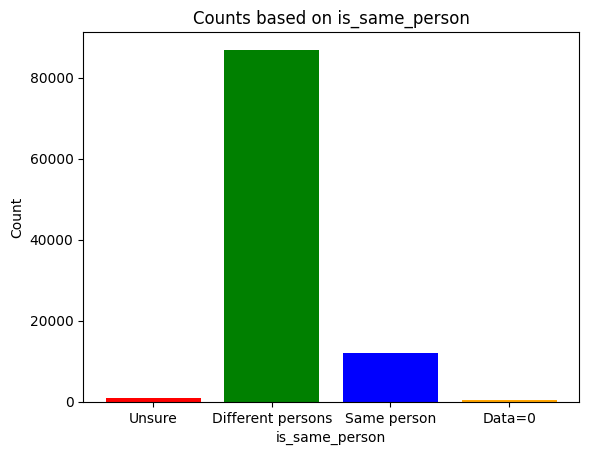

In [195]:
# Labels and counts
labels = ['Unsure', 'Different persons', 'Same person', 'Data=0']
counts = [count_3, count_2, count_1, count_0]

# Create a bar chart
plt.bar(labels, counts, color=['red', 'green', 'blue', 'orange'])

# Add labels and title
plt.xlabel('is_same_person')
plt.ylabel('Count')
plt.title('Counts based on is_same_person')

# Show the plot
plt.show()

As we can't make sense of which category the unsure data and data = 0 data type belongs to. Lets remove them for now


In [196]:
label_df = label_df[((label_df['is_same_person']!=0)& (label_df['is_same_person']!=3))]
label_df['is_same_person'].unique()

array([1, 2])

In [197]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98902 entries, 0 to 98999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aid             98902 non-null  object
 1   uid             98902 non-null  object
 2   is_same_person  98902 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 2.6+ MB


In [198]:
label_df['aid'].nunique()

60668

In [199]:
label_df['uid'].nunique()

62681

In [200]:
label_df['aid_uid'] = label_df["aid"]+'_'+label_df["uid"]
label_df

,aid,uid,is_same_person,aid_uid
0,758669,3808909,1,758669_3808909
1,933541,4049357,1,933541_4049357
2,312730,9915241,1,312730_9915241
3,620657,6569844,1,620657_6569844
4,925138,9504604,1,925138_9504604
...,...,...,...,...
98995,783867,1052378,2,783867_1052378
98996,492499,1511656,2,492499_1511656
98997,579125,2733476,2,579125_2733476
98998,293917,2360186,2,293917_2360186


In [201]:
# Check for missing values in 'aid' and 'uid' columns of face_similarity_df
missing_values_face_similarity = face_similarity_df[['aid', 'scores']].isnull().sum()
print("Missing values in face_similarity_df:")
print(missing_values_face_similarity)

# Check for missing values in 'aid' and 'uid' columns of label_df
missing_values_label = label_df[['aid', 'uid']].isnull().sum()
print("\nMissing values in label_df:")
print(missing_values_label)

Missing values in face_similarity_df:
aid       0
scores    0
dtype: int64

Missing values in label_df:
aid    0
uid    0
dtype: int64


### CONSTRUCTING DATASET


In [202]:
merge_df = pd.merge(merge_face_df,label_df,on='aid_uid')
merge_df.to_csv('merge_df.csv')
merge_df

,aid_uid,score,aid,uid,is_same_person
0,100011_2511448,33.083734,100011,2511448,2
1,100024_9273160,73.566027,100024,9273160,1
2,100034_9742638,67.927459,100034,9742638,2
3,100061_2889820,11.051541,100061,2889820,2
4,100064_2840104,56.861532,100064,2840104,2
...,...,...,...,...,...
60609,999967_8112139,65.727330,999967,8112139,1
60610,999971_9113682,27.641638,999971,9113682,2
60611,999981_8453447,78.738673,999981,8453447,1
60612,999984_6706605,18.122008,999984,6706605,2


### Distributions of the scores:


Lets look at the corresponding face-similarity score whisker plot of these types of identification


In [203]:
# Calculate summary statistics for each category
summary_stats = merge_df.groupby('is_same_person')['score'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
is_same_person,,,,,,,,
1,11210.0,71.123212,6.659018,58.141988,65.926685,69.945772,75.236019,100.0
2,49404.0,32.694517,12.896990,7.607163,22.920263,31.767723,41.092739,100.0


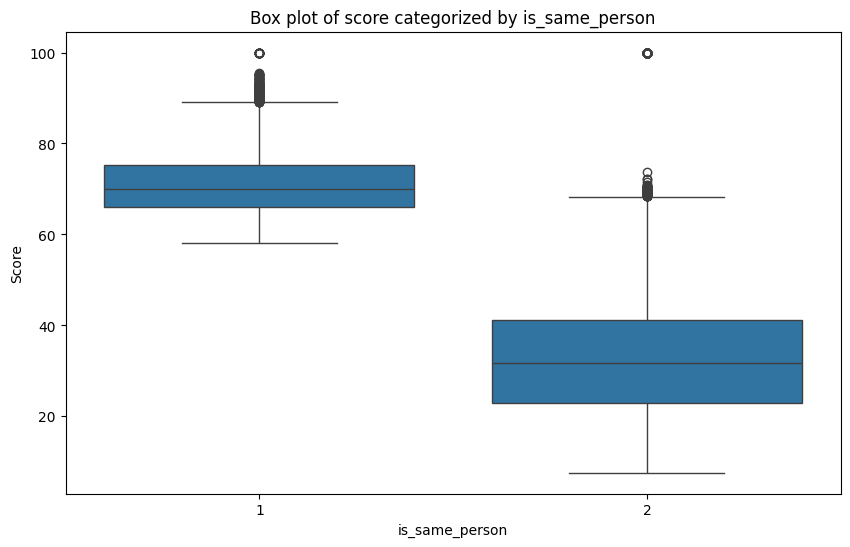

In [204]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_same_person', y='score', data=merge_df)

# Add labels and title
plt.xlabel('is_same_person')
plt.ylabel('Score')
plt.title('Box plot of score categorized by is_same_person')

# Show the plot
plt.show()


### Possible human errors in labeling:

There are instances where the operator marked as 2 different person even when score 100 and same aid, uid. Lets remove them.


In [205]:
diff_score = merge_df[((merge_df['score'] == 100) & (merge_df['is_same_person']==2))]
diff_score

,aid_uid,score,aid,uid,is_same_person
264,104113_104113,100.0,104113,104113,2
508,107740_107740,100.0,107740,107740,2
664,110169_110169,100.0,110169,110169,2
1622,124589_124589,100.0,124589,124589,2
1743,126315_126315,100.0,126315,126315,2
...,...,...,...,...,...
55876,929666_929666,100.0,929666,929666,2
55902,930084_930084,100.0,930084,930084,2
56168,933930_933930,100.0,933930,933930,2
60300,995056_995056,100.0,995056,995056,2


In [206]:
merge_df = merge_df[~((merge_df['score'] == 100) & (merge_df['is_same_person']==2))]
merge_df

,aid_uid,score,aid,uid,is_same_person
0,100011_2511448,33.083734,100011,2511448,2
1,100024_9273160,73.566027,100024,9273160,1
2,100034_9742638,67.927459,100034,9742638,2
3,100061_2889820,11.051541,100061,2889820,2
4,100064_2840104,56.861532,100064,2840104,2
...,...,...,...,...,...
60609,999967_8112139,65.727330,999967,8112139,1
60610,999971_9113682,27.641638,999971,9113682,2
60611,999981_8453447,78.738673,999981,8453447,1
60612,999984_6706605,18.122008,999984,6706605,2


### Choosing an optimal threshold:


Lets use the 1st percentile of category 1 as a test


In [213]:
def confusion_table(df,threshold):

    # Create a new column based on the threshold
    df['is_same_person_sim'] = df['score'].apply(lambda x: 1 if x >= threshold else 2)

    # Create a new column 'conf' based on the classification
    df['conf'] = 'TN'  # Default value for True Negative

    # Update 'conf' based on classification
    df.loc[(df['is_same_person_sim'] == 1) & (df['is_same_person'] == 1), 'conf'] = 'TP'  # True Positive
    df.loc[(df['is_same_person_sim'] == 2) & (df['is_same_person'] == 1), 'conf'] = 'FN'  # False Negative
    df.loc[(df['is_same_person_sim'] == 1) & (df['is_same_person'] == 2), 'conf'] = 'FP'  # False Positive

    # Count the values in the 'conf' column
    conf_counts = df['conf'].value_counts()

    # Print the confusion model table
    print("Confusion Model Table:")
    print(conf_counts)


confusion_table(merge_df,65.925887)

Confusion Model Table:
conf
TN    49030
TP     8408
FN     2802
FP      271
Name: count, dtype: int64


C:\Users\qtranhu\AppData\Local\Temp\ipykernel_26524\2033624318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_same_person_sim'] = df['score'].apply(lambda x: 1 if x >= threshold else 2)
C:\Users\qtranhu\AppData\Local\Temp\ipykernel_26524\2033624318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conf'] = 'TN'  # Default value for True Negative


In [214]:
#define functions to judge the threshold 
def cal_precision(df):
    tp = df[(df['is_same_person_sim'] == 1) & (df['is_same_person'] == 1)]['conf'].count()
    fp = df[(df['is_same_person_sim'] == 1) & (df['is_same_person'] != 1)]['conf'].count()
    return tp/(fp+tp)

def cal_recall(df):
    tp = df[(df['is_same_person_sim'] == 1) & (df['is_same_person'] == 1)]['conf'].count()
    positive = df[(df['is_same_person'] == 1)]['conf'].count()
    return tp/positive

In [215]:
precision = cal_precision(merge_df)
recall = cal_recall(merge_df)
print(f'Here we got a precision score of {precision*100}%, and a recall of {recall*100}%')

Here we got a precision score of 96.87752045166494%, and a recall of 75.00446030330062%


Lets reduce the number of false positive by defining a threshold, i.e maximum score where the operator classified as 2 but the system return 1. Lets try that out


In [216]:
threshold2 = merge_df[((merge_df['is_same_person']==2)&(merge_df['is_same_person_sim']==1))]['score'].max()
threshold2

73.72482662759145

In [217]:
confusion_table(merge_df,threshold2)

Confusion Model Table:
conf
TN    49300
FN     7682
TP     3528
FP        1
Name: count, dtype: int64


C:\Users\qtranhu\AppData\Local\Temp\ipykernel_26524\2033624318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_same_person_sim'] = df['score'].apply(lambda x: 1 if x >= threshold else 2)
C:\Users\qtranhu\AppData\Local\Temp\ipykernel_26524\2033624318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conf'] = 'TN'  # Default value for True Negative


In [218]:
precision = cal_precision(merge_df)
recall = cal_recall(merge_df)
print(f'Here we got a precision score of {precision*100}%, and a recall of {recall*100}%')

Here we got a precision score of 99.97166336072542%, and a recall of 31.471900089206066%


## Conclusion


We sacrifices the recall rate by a great deal (from 75% to 31%) to maximize our precision (from 97% to 99.9%). Meaning 99.9% of the time the model will be right if it says that they are the same person (as confirmed by the operator), however, it will only get 31 out of 100 instances that are actually the same person.
We neglected the uncategorized labelling - 0, and unsure label type by the operator, this should have been further discussed on a proper approach to deal with
